# Analysis - Core algorithm

Analysis of the core algorithm based on Bitcoin core

In [2]:
%pylab inline
import pandas as pd
import numpy as np

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

Populating the interactive namespace from numpy and matplotlib


In [18]:
def preprocess(df):
    df = df.replace(-1.00, np.nan)
    df = df.sort_values(by=['block_number'])
    return df

dfcore = pd.read_csv('data/feeestimation/corescores2019-01-11.csv')
dfcore = preprocess(dfcore)

In [20]:
avg_rateeco = dfcore["priceEconomical"].mean()
std_rateeco = dfcore["priceEconomical"].std()
print("The average economical fee-per-byte-rate is: " + str(avg_rateeco) + " Satoshi per byte. std: " + str(std_rateeco))

avg_ratestandard = dfcore["priceStandard"].mean()
std_ratestandard = dfcore["priceStandard"].std()
print("The average standard fee-per-byte-rate is: " + str(avg_ratestandard) + " Satoshi per byte. std: " + str(std_ratestandard))

avg_ratefast = dfcore["priceFast"].mean()
std_ratefast = dfcore["priceFast"].std()
print("The average standard fee-per-byte-rate is: " + str(avg_ratefast) + " Satoshi per byte. std: " + str(std_ratefast))

The average economical fee-per-byte-rate is: 2.56221568627451 Satoshi per byte. std: 1.5041361283304846
The average standard fee-per-byte-rate is: 7.723588235294118 Satoshi per byte. std: 6.652897471557699
The average standard fee-per-byte-rate is: 24.57254901960784 Satoshi per byte. std: 9.627880739422826


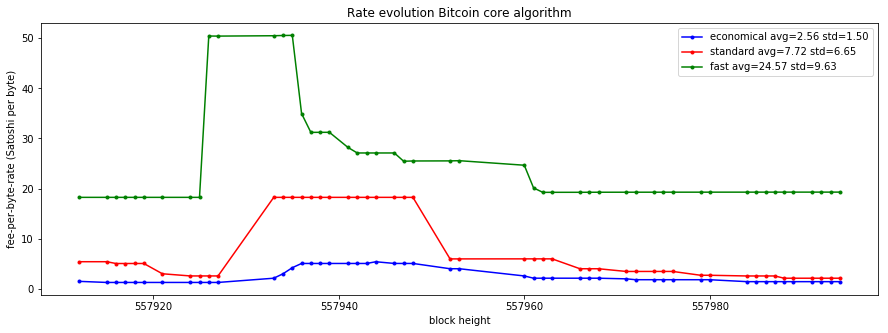

In [30]:
import matplotlib.pyplot as plt

x = dfcore["block_number"].values
y1 = dfcore["priceEconomical"].values
y2 = dfcore["priceStandard"].values
y3 = dfcore["priceFast"].values

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.plot(x,y1, c='b', marker='.', label='economical avg=' +'{:0.2f}'.format(avg_rateeco) + ' std='+'{:0.2f}'.format(std_rateeco))
ax.plot(x,y2, c='r', marker='.', label='standard avg=' +'{:0.2f}'.format(avg_ratestandard) + ' std='+'{:0.2f}'.format(std_ratestandard))
ax.plot(x,y3, c='g',marker='.', label='fast avg=' +'{:0.2f}'.format(avg_ratefast) + ' std='+'{:0.2f}'.format(std_ratefast))

plt.xlabel('block height')
ax.ticklabel_format(useOffset=False)
plt.ylabel('fee-per-byte-rate (Satoshi per byte)')
plt.title('Rate evolution Bitcoin core algorithm')
plt.legend(loc=1)

In [13]:
def getPercentage(cols):
    minScore = dfcore[cols].min(axis=1)
    numberOfBlocks = minScore.count()
    numberOfBlocksWithoutInclusion = minScore[minScore > 95].count()
    if numberOfBlocksWithoutInclusion is None:
        numberOfBlocksWithoutInclusion = 0
    percentage = (100 / numberOfBlocks) * numberOfBlocksWithoutInclusion
    print(percentage)
    return percentage

61.11111111111111
33.33333333333333
8.333333333333332
51.21951219512195
21.95121951219512
7.317073170731707
41.30434782608695
15.217391304347824
6.521739130434782
31.250000000000004
12.5
6.25
18.75
8.333333333333334
4.166666666666667
18.367346938775512
8.16326530612245
4.081632653061225
16.0
6.0
4.0
12.0
2.0
2.0
12.0
0.0
0.0
12.0
0.0
0.0


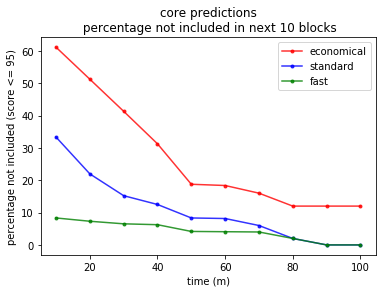

In [15]:
x1 = []
y1 = []
y2 = []
y3 = []
avg_blocktime = 10
colsSlow = []
colsStd = []
colsFast = []
for idx in range(1, 11, 1):
    colsSlow.append("scoreEconomicalPlus" + str(idx))
    colsStd.append("scoreStandardPlus" + str(idx))
    colsFast.append("scoreFastPlus" + str(idx))
    percentage1 = getPercentage(colsSlow)
    y1.append(percentage1)
    percentage2 = getPercentage(colsStd)
    y2.append(percentage2)
    percentage3 = getPercentage(colsFast)
    y3.append(percentage3)
    x1.append(idx * avg_blocktime)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x1, y1, alpha=0.8, c='r', marker='.', label='economical')
ax.plot(x1, y2, alpha=0.8, c='b', marker='.', label='standard')
ax.plot(x1, y3, alpha=0.8, c='g', marker='.', label='fast')
#plt.axvline(x=60.0, color='g', linestyle='--')

plt.xlabel('time (m)')
plt.ylabel('percentage not included (score <= 95)')
plt.title('core predictions\n percentage not included in next 10 blocks')
plt.legend(loc=1)